In [2]:
import pandas as pd
from utils.createCSV import createCSV
from matplotlib import pyplot as plt
from utils.dataloader import CustomImageDataset
import torchvision.transforms as transforms
from PIL import Image
import torch
from torchvision.transforms.autoaugment import AutoAugmentPolicy
from torch.utils.data import Dataset, DataLoader
import cv2

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
img = Image.open('../test/H0001.jpg')
#img = Image.open('../test/tarsero.jpg')
transform = transforms.ToTensor()

In [39]:
imgTensor = transform(img)
mean = torch.mean(imgTensor, dim = [1,2])
std = torch.std(imgTensor, dim = [1,2])
train_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.Normalize(mean, std, inplace=True), transforms.AutoAugment()])

In [108]:
imgTensor = transform(img)
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.RandomChoice([transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip()]),
                                       
                                        #transforms.AutoAugment()
                                      ])
                                                                                             
                                                                                                                                                                  

In [58]:
imgTensor = transform(img)
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                        transforms.RandomChoice([transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip()]),
                                        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                        transforms.RandomRotation(degrees=30),
                                        transforms.RandomGrayscale(p=0.2),
])

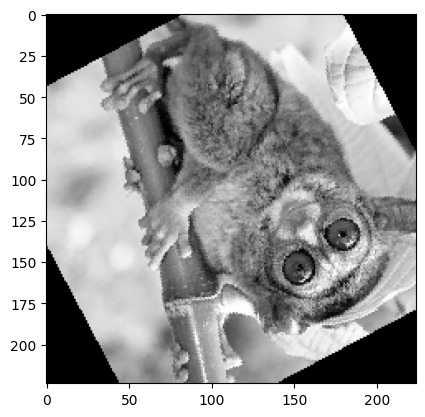

In [59]:
plt.imshow(train_transforms(imgTensor).permute(1, 2, 0))

In [60]:
train_transforms(imgTensor).permute(1, 2, 0).max(), train_transforms(imgTensor).permute(1, 2, 0).min()

(tensor(0.9930), tensor(0.))

Feature batch shape: torch.Size([3, 1444, 1444])
Labels batch shape: torch.Size([3])


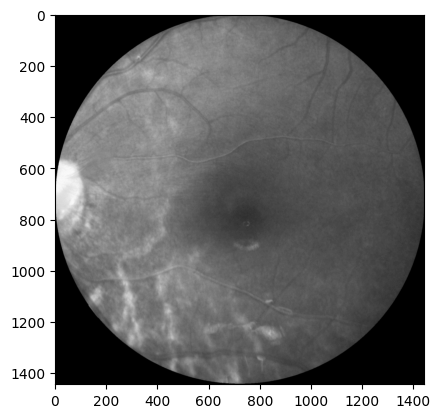

Label: 1


In [22]:
#train_features, train_labels = next(iter(CustomImageDataset("./output.csv",train_transforms)))
train_features, train_labels =next(iter(CustomImageDataset("./output.csv","../test/",train_transforms)))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

torch.Size([2, 3, 224, 224])
torch.Size([2, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([2, 3, 224, 224])
Labels batch shape: torch.Size([2, 3])


<function matplotlib.pyplot.show(close=None, block=None)>

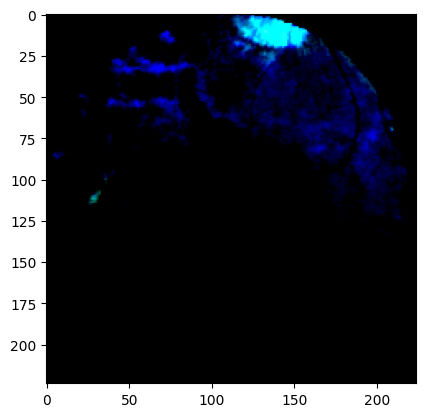

In [48]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.RandomCrop((224,224)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomChoice([transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip()]),
    transforms.RandomRotation(degrees=30),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    
])

dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = train_transforms, target_transform=None)

dl = DataLoader(dataset,batch_size=2,shuffle=True)


for image, label in dl:
    print(image.shape)
    print(label.shape)
    break
    
train_features, train_labels = next(iter(dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = (img.T).detach().numpy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

#img.T: Esta operación transpone la imagen, lo que significa que los ejes de filas y columnas se intercambian.
#.detach(): Este método se utiliza para desasociar un tensor de PyTorch de su gráfico de computación y devolver un numpy array, que es más fácil de manejar para algunas operaciones.
#.numpy(): Este método convierte un tensor de PyTorch en un array de numpy.
#cv2.cvtColor de OpenCV para cambiar su formato de BGR a RGB. Este cambio es necesario porque la mayoría de las funciones de visualización en Python, incluyendo plt.imshow de Matplotlib, esperan que la imagen esté en formato RGB en lugar de BGR.






In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

In [ ]:
!nvidia-smi

In [9]:
df = pd.read_csv("./output.csv")

In [3]:
df.columns

Index(['index', 'imgPath', 'label'], dtype='object')

In [5]:
df.loc[0,"label"]

'H0001.jpg'

In [6]:
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
# def one_hot_encode(data):
#     drop_enc = OneHotEncoder(drop='first').fit(data)
#     drop_enc.categories_
#     drop_enc.transform(data).toarray()
#     return drop_enc

In [8]:
import torch
import torch.nn.functional as Fun
A = torch.tensor(0,device="cuda")
output = Fun.one_hot(A, num_classes = 3)
print(output)

tensor([1, 0, 0], device='cuda:0')


0    1
1    1
2    1
3    1
4    1
5    1
Name: label, dtype: int64